## 1.1. Метод простых итераций

Найти решение задачи
$$\Delta u = 0, \quad 0 < x < 1, \ 0 < y < π,\\
u(x, y)|_\Gamma = \mu(x, y)
$$
методом простой итерации. Отладить решение задачи на функции $u^*(x, y) = e^x sin(y)$.
В качестве критерия конца вычислений использовать условие: $\frac{\|U^k − u^*\|}{\|U_0-u^*\|}$.

In [167]:
import numpy as np
import math

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)

eps = 1e-3

# концы отрезков
l_x = 1
l_y = np.pi

# кол-во разбиений
x_N = 10
y_N = 10

In [168]:
def u(x, y):
    return np.exp(x) * np.sin(y)


xs = np.linspace(0, l_x, x_N)
ys = np.linspace(0, l_y, y_N)
X, Y = np.meshgrid(xs, ys)

U = np.zeros((x_N, y_N))
U_precise = u(X, Y)

# Строим граничные условия
U[0, :] = U_precise[0, :]
U[-1, :] = U_precise[-1, :]
U[:, 0] = U_precise[:, 0]
U[:, -1] = U_precise[:, -1]

# Начальное приближение
U_first = np.copy(U)

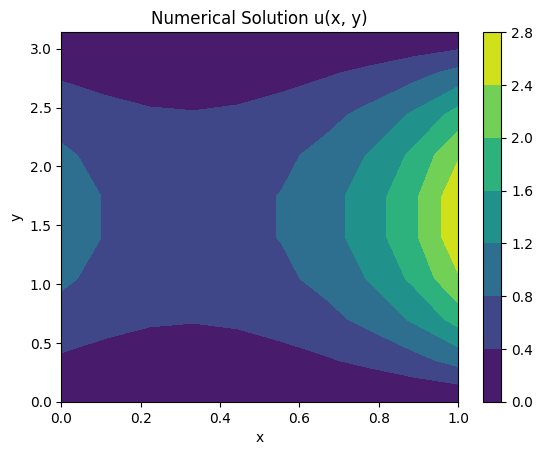

In [169]:
h_x = l_x / (x_N - 1)
m = math.ceil(2 * math.log(1 / eps) / pow(np.pi * h_x, 2))

for iteration in range(m):
    U_new = np.copy(U)
    for i in range(1, x_N - 1):
        for j in range(1, y_N - 1):
            U_new[i, j] = 0.25 * (U[i - 1, j] + U[i + 1, j] + U[i, j - 1] + U[i, j + 1])

    # Проверяем сходимость
    if np.max(np.abs(U_new - U_precise)) / np.max(np.abs(U_first - U_precise)) < eps:
        break
    U = U_new

# Визуализируем результат, используя библиотеку Matplotlib
import matplotlib.pyplot as plt

plt.contourf(X, Y, U, cmap='viridis')
plt.colorbar()
plt.title('Numerical Solution u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

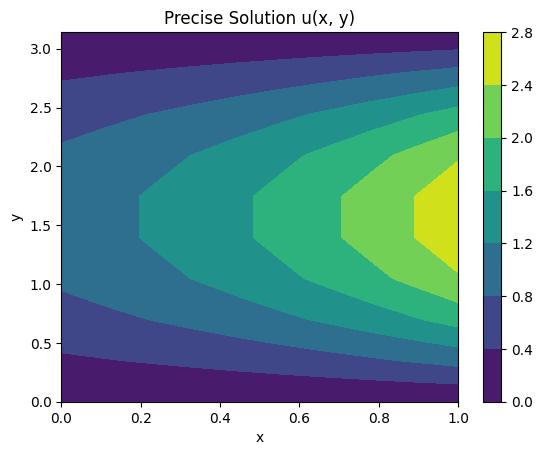

In [170]:
# Визуализируем ожидаемый результат точного решения
plt.contourf(X, Y, U_precise, cmap='viridis')
plt.colorbar()
plt.title('Precise Solution u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()